In [1]:
!git clone https://github.com/PrashantMali07/IIT-Madras-Advanced-Certification-in-Data-Science-and-AI.git

fatal: destination path 'IIT-Madras-Advanced-Certification-in-Data-Science-and-AI' already exists and is not an empty directory.


# In this project you will be working on two different datasets in which one dataset contains news headlines with unlabeled sentiments. And another dataset contains labeled tweets from the twitter data.

## PART 1: Sentiment analysis on tweets or phrases

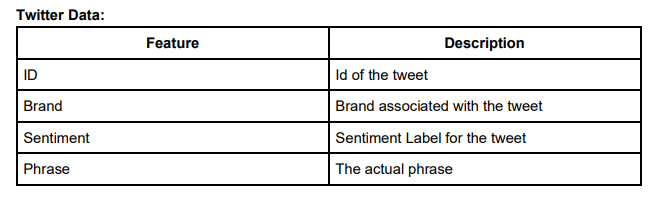

In [2]:
# importing the required libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Feature Generation Using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer


#tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

#splitting in training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
twitter = pd.read_csv("/content/IIT-Madras-Advanced-Certification-in-Data-Science-and-AI/Assignment/NLP/NLP_Assignment/twitter_training.csv")
twitter.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
twitter.columns = ['Id', 'Brand', 'Sentiment', 'tweets']
twitter.head()

,Id,Brand,Sentiment,tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
twitter.info() # tweets columns has some null enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74681 non-null  int64 
 1   Brand      74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   tweets     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
twitter.isna().sum()

Id             0
Brand          0
Sentiment      0
tweets       686
dtype: int64

In [8]:
# dropping the nan values
twitter = twitter.dropna()

In [9]:
twitter.shape

(73995, 4)

In [10]:
# required functions for the word preprocessing steps

# for lowering the sentences
def lowercase_text(text):
    return text.lower()


def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


def tokenize_text(text):
    return nltk.word_tokenize(text)


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text if word.lower() not in stop_words]
    return filtered_text


In [11]:
twitter['final_text'] = twitter.tweets.apply(lowercase_text).apply(remove_punctuation).apply(tokenize_text).apply(remove_stopwords)

twitter.head(20)

,Id,Brand,Sentiment,tweets,final_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,"[spent, hours, making, something, fun, dont, k..."
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,"[spent, couple, hours, something, fun, dont, k..."
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,"[spent, hours, something, fun, dont, know, im,..."
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,"[spent, hours, making, something, fun, dont, k..."
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,"[2010, spent, hours, making, something, fun, d..."


In [12]:
twitter = twitter[twitter['final_text'].notnull()]
twitter = twitter[twitter['final_text'].map(lambda x: len(x) > 0)]
twitter.shape

(72437, 5)

In [13]:
twitter = twitter.reset_index()

In [14]:
# twitter.to_csv('twitter_new.csv', header=False, index=False)

In [15]:
# converting the list of words into the sentences from the 'final_text' columns 

for i in range(len(twitter)):
  twitter['final_text'][i] = " ".join(twitter['final_text'][i])

<ipython-input-15-eb057d5ee301>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter['final_text'][i] = " ".join(twitter['final_text'][i])


In [16]:
twitter.head()

,index,Id,Brand,Sentiment,tweets,final_text
0,0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder
4,4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder


In [17]:
# encoding the target column

le = LabelEncoder()
twitter['Sentiment'] = le.fit_transform(twitter['Sentiment'])

In [18]:
le.classes_

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [19]:
# generating feature using BAG OF WORDS

cv = CountVectorizer(ngram_range = (1,1))
num_of_text = cv.fit_transform(twitter['final_text'])

In [20]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72437 entries, 0 to 72436
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       72437 non-null  int64 
 1   Id          72437 non-null  int64 
 2   Brand       72437 non-null  object
 3   Sentiment   72437 non-null  int64 
 4   tweets      72437 non-null  object
 5   final_text  72437 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.3+ MB


In [21]:
#splitting in training and testing data without performing Tf-Idf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(num_of_text, twitter['Sentiment'], test_size = 0.2, random_state=0)

In [22]:
#model Building Decision Tree

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
#predictions 
pred = classifier.predict(X_test)

In [24]:
print(classification_report(y_test, pred))
print("\n\nAccuracy Score with RandomForestClassifier: ",accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2492
           1       0.85      0.85      0.85      4430
           2       0.83      0.81      0.82      3560
           3       0.79      0.85      0.82      4006

    accuracy                           0.83     14488
   macro avg       0.83      0.82      0.82     14488
weighted avg       0.83      0.83      0.83     14488



Accuracy Score with RandomForestClassifier:  0.8257178354500276


In [25]:
#tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf = tf.fit_transform(twitter['final_text'])

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(text_tf, twitter['Sentiment'], test_size = 0.2, random_state=0)

In [27]:
#model Building Random Forest

classifier1 = RandomForestClassifier(n_estimators=200)
classifier1.fit(Xtrain, ytrain)

#predictions 
pred1 = classifier1.predict(X_test)

print(classification_report(y_test, pred1))

print("\n\nAccuracy Score with RandomForestClassifier: ",accuracy_score(y_test, pred1))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78      2492
           1       0.83      0.90      0.86      4430
           2       0.89      0.71      0.79      3560
           3       0.73      0.91      0.81      4006

    accuracy                           0.82     14488
   macro avg       0.84      0.80      0.81     14488
weighted avg       0.83      0.82      0.82     14488



Accuracy Score with RandomForestClassifier:  0.8190916620651574


In [28]:
#model Building GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GB_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate= 0.1)
GB_classifier.fit(Xtrain, ytrain)

#predictions 
pred2 = GB_classifier.predict(X_test)

print(classification_report(y_test, pred2))

print("\n\nAccuracy Score with RandomForestClassifier: ",accuracy_score(y_test, pred1))

              precision    recall  f1-score   support

           0       0.57      0.13      0.21      2492
           1       0.43      0.77      0.55      4430
           2       0.56      0.28      0.38      3560
           3       0.52      0.54      0.53      4006

    accuracy                           0.48     14488
   macro avg       0.52      0.43      0.42     14488
weighted avg       0.51      0.48      0.44     14488



Accuracy Score with RandomForestClassifier:  0.8190916620651574
